## 영화 리뷰 분석
---
- IMDB 데이터 활용

In [1]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence, Tokenizer
from tensorflow.keras.datasets.imdb import load_data
from tensorflow.keras.utils import pad_sequences
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import numpy as np

## [1] 데이터 준비

In [2]:
# 단어사전(voca)에서 빈도가 높은 500개까지만 사용하도록 설정
(X_train, y_train), (X_test, y_test)=load_data(num_words=500) # num_words=500

In [3]:
print(f'imDF 정보 \nX_train: {X_train.shape}, y_train : {y_train.shape}')
print(f'X_test : {X_test.shape}, y_test : {y_test.shape}')

imDF 정보 
X_train: (25000,), y_train : (25000,)
X_test : (25000,), y_test : (25000,)


In [4]:
print(X_train[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [5]:
for idx in range(3):
    print(f'[{idx} - {y_train[idx]}]\n{X_train[idx]}')
    print('--------------------------------------------------------------')

[0 - 1]
[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
--------------------------------------------------------------
[1 - 0]
[1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 2, 8, 118, 2, 14

## [2] 학습용 데이터 변환
---
- keras에서 이미 대부분의 전처리 끝난 데이터
- 길이 조정 => 패딩(Padding)
- https://www.dinolabs.ai/189

In [6]:
pad_sequences(X_train)

array([[  0,   0,   0, ...,  19, 178,  32],
       [  0,   0,   0, ...,  16, 145,  95],
       [  0,   0,   0, ...,   7, 129, 113],
       ...,
       [  0,   0,   0, ...,   4,   2,   2],
       [  0,   0,   0, ...,  12,   9,  23],
       [  0,   0,   0, ..., 204, 131,   9]])

In [7]:
print(len(pad_sequences(X_train)))

25000


In [8]:
# [2-1]데이터별 길이 결정
padded = pad_sequences(X_train)
padded

array([[  0,   0,   0, ...,  19, 178,  32],
       [  0,   0,   0, ...,  16, 145,  95],
       [  0,   0,   0, ...,   7, 129, 113],
       ...,
       [  0,   0,   0, ...,   4,   2,   2],
       [  0,   0,   0, ...,  12,   9,  23],
       [  0,   0,   0, ..., 204, 131,   9]])

In [9]:
print(padded.shape)

(25000, 2494)


In [10]:
# [2-2]데이터별 길이 변경
padded1 = pad_sequences(X_train, maxlen=100)
padded1

array([[  2,  33,   6, ...,  19, 178,  32],
       [163,  11,   2, ...,  16, 145,  95],
       [  2,   4,   2, ...,   7, 129, 113],
       ...,
       [ 11,   6,   2, ...,   4,   2,   2],
       [100,   2,   8, ...,  12,   9,  23],
       [ 78,   2,  17, ..., 204, 131,   9]])

In [11]:
print(padded1.shape)

(25000, 100)


In [12]:
# (1) 전체 리뷰의 길이 측정
all_length=np.array([len(x) for x in X_train])

print(f'all_length : {np.mean(all_length)}, {np.median(all_length)}')

np.unique(all_length)
np.unique(all_length, return_counts=True)

all_length : 238.71364, 178.0


(array([  11,   12,   13, ..., 1851, 1854, 2494]),
 array([2, 1, 2, ..., 1, 1, 1], dtype=int64))

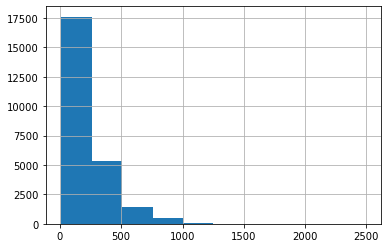

In [13]:
import matplotlib.pyplot as plt

plt.hist(all_length)
plt.grid()
plt.show()

In [14]:
# [2-2] 데이터별 길이 변경
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(X_train, maxlen=100)
test_seq = pad_sequences(X_test, maxlen=100)
train_seq.shape
# to_categorical()

(25000, 100)

In [15]:
train_seq

array([[  2,  33,   6, ...,  19, 178,  32],
       [163,  11,   2, ...,  16, 145,  95],
       [  2,   4,   2, ...,   7, 129, 113],
       ...,
       [ 11,   6,   2, ...,   4,   2,   2],
       [100,   2,   8, ...,  12,   9,  23],
       [ 78,   2,  17, ..., 204, 131,   9]])

In [16]:
print(X_train[2])
print(train_seq[2])

[1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 2, 54, 61, 369, 13, 71, 149, 14, 22, 112, 4, 2, 311, 12, 16, 2, 33, 75, 43, 2, 296, 4, 86, 320, 35, 2, 19, 263, 2, 2, 4, 2, 33, 89, 78, 12, 66, 16, 4, 360, 7, 4, 58, 316, 334, 11, 4, 2, 43, 2, 2, 8, 257, 85, 2, 42, 2, 2, 83, 68, 2, 15, 36, 165, 2, 278, 36, 69, 2, 2, 8, 106, 14, 2, 2, 18, 6, 22, 12, 215, 28, 2, 40, 6, 87, 326, 23, 2, 21, 23, 22, 12, 272, 40, 57, 31, 11, 4, 22, 47, 6, 2, 51, 9, 170, 23, 2, 116, 2, 2, 13, 191, 79, 2, 89, 2, 14, 9, 8, 106, 2, 2, 35, 2, 6, 227, 7, 129, 113]
[  2   4   2  33  89  78  12  66  16   4 360   7   4  58 316 334  11   4
   2  43   2   2   8 257  85   2  42   2   2  83  68   2  15  36 165   2
 278  36  69   2   2   8 106  14   2   2  18   6  22  12 215  28   2  40
   6  87 326  23   2  21  23  22  12 272  40  57  31  11   4  22  47   6
   2  51   9 170  23   2 116   2   2  13 191  79   2  89   2  14   9   8
 106   2   2  35   2   6 227   7 129 113]


In [17]:
from tensorflow.keras.utils import to_categorical

In [18]:
train_oh = to_categorical(train_seq)
test_oh = to_categorical(test_seq)

In [19]:
train_oh.shape, train_oh[0]

((25000, 100, 500),
 array([[0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_val, y_train, y_val = train_test_split(train_oh,
                                                  y_train, test_size=0.2, random_state=42)

In [22]:
print(f'X_train : {X_train.shape}\ntest_seq : {test_seq.shape}\nX_val : {X_val.shape}')
print(f'X_train : {y_train.shape}\ny_test : {y_test.shape}\ny_val : {y_val.shape}')

X_train : (20000, 100, 500)
test_seq : (25000, 100)
X_val : (5000, 100, 500)
X_train : (20000,)
y_test : (25000,)
y_val : (5000,)


# 모델
---
- 목표 : 영화리뷰 데이터 학습 후 사용자가 입력하는 리뷰가 긍정/부정 분류
- 학습모델 : RNN 순환신경망
- 입력 : 500
- 출력 : 1 => 분류 => 2진분류

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

### [3-1] 모델 구성
---
- 입력층 : 노드 n개 타임스템수, 피쳐수 => SimpleRNN
- 출력층 : 노드 1개 sigmoid => Dense
- https://wikidocs.net/22886

In [24]:
# import tensorflow as tf

# inputs = np.random.random([100, 500]).astype(np.float32)
# simple_rnn = tf.keras.layers.SimpleRNN(1)

# output = simple_rnn(inputs)

# simple_rnn = tf.keras.layers.SimpleRNN(1, return_sequences=True,
#                                        return_sequences=True)

# whole_sequence_output, final_state = simple_rnn(inputs)

In [26]:
model=Sequential()
model.add(SimpleRNN(9, input_shape=(100, 500)))   # 1개 노드 = w500+b+hw9 * 9
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 9)                 4590      
                                                                 
 dense (Dense)               (None, 1)                 10        
                                                                 
Total params: 4,600
Trainable params: 4,600
Non-trainable params: 0
_________________________________________________________________


### [3-2] 모델 생성
---
- 손실함수, 최적화방법, 평가항목 => compile()

In [27]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics='accuracy')

### [4] 학습
---
- train 데이터와 타겟으로 학습 진행
- epoch마다 검증 진행 => validation_data, validation_split
- 학습 진행 내용 조절 => callbacks=[]
- 학습 진행 내용 조절 => verbose
- 학습 횟수 조절 => epochs
- 배치사이즈 조절 => batch_size (기:32)

In [28]:
from keras.callbacks import EarlyStopping
earlyST=EarlyStopping(monitor='val_loss', patience=3)

In [29]:
history = model.fit(X_train, y_train, batch_size=32,
                    epochs = 50, validation_data = (X_val,y_val),
                    verbose = 1, callbacks=[earlyST])

Epoch 1/50
625/625 [==============================] - 10s 14ms/step - loss: 0.6910 - accuracy: 0.5283 - val_loss: 0.6864 - val_accuracy: 0.5428
Epoch 2/50
625/625 [==============================] - 8s 12ms/step - loss: 0.6722 - accuracy: 0.5883 - val_loss: 0.6744 - val_accuracy: 0.5690
Epoch 3/50
625/625 [==============================] - 8s 13ms/step - loss: 0.6431 - accuracy: 0.6291 - val_loss: 0.6580 - val_accuracy: 0.5958
Epoch 4/50
625/625 [==============================] - 8s 13ms/step - loss: 0.6075 - accuracy: 0.6684 - val_loss: 0.6557 - val_accuracy: 0.6006
Epoch 5/50
625/625 [==============================] - 8s 13ms/step - loss: 0.5490 - accuracy: 0.7235 - val_loss: 0.5274 - val_accuracy: 0.7440
Epoch 6/50
625/625 [==============================] - 8s 13ms/step - loss: 0.4591 - accuracy: 0.7907 - val_loss: 0.5157 - val_accuracy: 0.7578
Epoch 7/50
625/625 [==============================] - 9s 14ms/step - loss: 0.4357 - accuracy: 0.8031 - val_loss: 0.5338 - val_accuracy: 0.735

In [30]:
print(history.history)

{'loss': [0.6909963488578796, 0.6721850633621216, 0.643079400062561, 0.6074572801589966, 0.5489798188209534, 0.45913609862327576, 0.43569228053092957, 0.41994231939315796, 0.405708372592926], 'accuracy': [0.5283499956130981, 0.5882999897003174, 0.6290500164031982, 0.6684499979019165, 0.7235000133514404, 0.7907000184059143, 0.8030999898910522, 0.8127999901771545, 0.8187999725341797], 'val_loss': [0.6864272952079773, 0.6743699312210083, 0.6580140590667725, 0.6557244062423706, 0.5274038910865784, 0.5156533122062683, 0.5337814092636108, 0.5198759436607361, 0.537260115146637], 'val_accuracy': [0.5428000092506409, 0.5690000057220459, 0.59579998254776, 0.600600004196167, 0.7440000176429749, 0.7577999830245972, 0.7350000143051147, 0.7477999925613403, 0.743399977684021]}


### 그래프
- https://codetorial.net/tensorflow/visualize_training_history.html

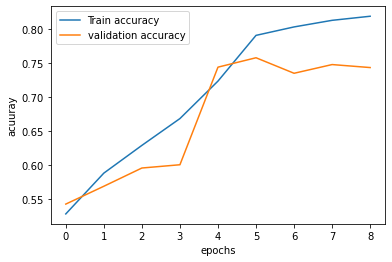

In [31]:
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend(['Train accuracy', 'validation accuracy'])
plt.xlabel('epochs')
plt.ylabel('acuuray')
plt.show()

### Embedding RNN Model
---
- One-Hot-Encoding 입력 데이터의 많은 메모리 소모에 대한 문제 해결
- 토큰을 밀집형태의 벡터로 변경 ==> Word Embedding
- Embedding Layer 적용
    * 입력 차원 - 토큰의 크기 즉 단어사전의 크기
    * 출력 차원 - 줄여서 생성하는 벡터 크기
    * 입력 층일경우 -> input_dim = 타임스템프 즉 하나의 문장을 구성하는 토큰 수

In [42]:
from tensorflow.keras.layers import Embedding

In [43]:
model2=Sequential()
# One-Hot-Encoding 500개의 거대한 데이터 => 밀집형태 20크기 벡터로 변환
model2.add(Embedding(500, 20, input_length=100))
model2.add(SimpleRNN(10))
model2.add(Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 20)           10000     
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 10,321
Trainable params: 10,321
Non-trainable params: 0
_________________________________________________________________


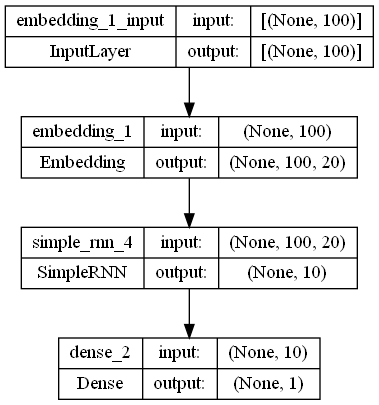

In [44]:
from tensorflow.keras.utils import plot_model

plot_model(model2, show_shapes=True)

In [45]:
model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [46]:
earlyST1=EarlyStopping(monitor='val_loss', patience=3)

In [47]:
history1 = model2.fit(X_train, y_train, batch_size=32,
                    epochs = 50, validation_data = (X_val,y_val),
                    verbose = 1, callbacks=[earlyST1])

Epoch 1/50


ValueError: in user code:

    File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\keras\engine\input_spec.py", line 214, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential_3" (type Sequential).
    
    Input 0 of layer "simple_rnn_4" is incompatible with the layer: expected ndim=3, found ndim=4. Full shape received: (32, 100, 500, 20)
    
    Call arguments received by layer "sequential_3" (type Sequential):
      • inputs=tf.Tensor(shape=(32, 100, 500), dtype=float32)
      • training=True
      • mask=None
